In [1]:
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Using device: cpu
Starting Training...
[Epoch 0/15] [Batch 0/469] [D loss: 1.5939] [G loss: 0.8539]
[Epoch 0/15] [Batch 50/469] [D loss: 1.3800] [G loss: 1.6991]
[Epoch 0/15] [Batch 100/469] [D loss: 1.3704] [G loss: 0.9471]
[Epoch 0/15] [Batch 150/469] [D loss: 1.3682] [G loss: 0.8507]
[Epoch 0/15] [Batch 200/469] [D loss: 1.3452] [G loss: 0.7437]
[Epoch 0/15] [Batch 250/469] [D loss: 1.1969] [G loss: 0.9374]
[Epoch 0/15] [Batch 300/469] [D loss: 1.2303] [G loss: 0.7820]
[Epoch 0/15] [Batch 350/469] [D loss: 1.3379] [G loss: 0.9607]
[Epoch 0/15] [Batch 400/469] [D loss: 1.4903] [G loss: 1.4360]
[Epoch 0/15] [Batch 450/469] [D loss: 1.3478] [G loss: 1.1199]

Epoch [0/15] - Average G_loss: 1.1128, Average D_loss: 1.2468

[Epoch 1/15] [Batch 0/469] [D loss: 1.3332] [G loss: 0.9478]
[Epoch 1/15] [Batch 50/469] [D loss: 1.3413] [G loss: 0.7854]
[Epoch 1/15] [Batch 100/469] [D loss: 1.2392] [G loss: 0.9650]
[Epoch 1/15] [Batch 150/469] [D loss: 1.4427] [G loss: 0.6156]
[Epoch 1/15] [Batch 2

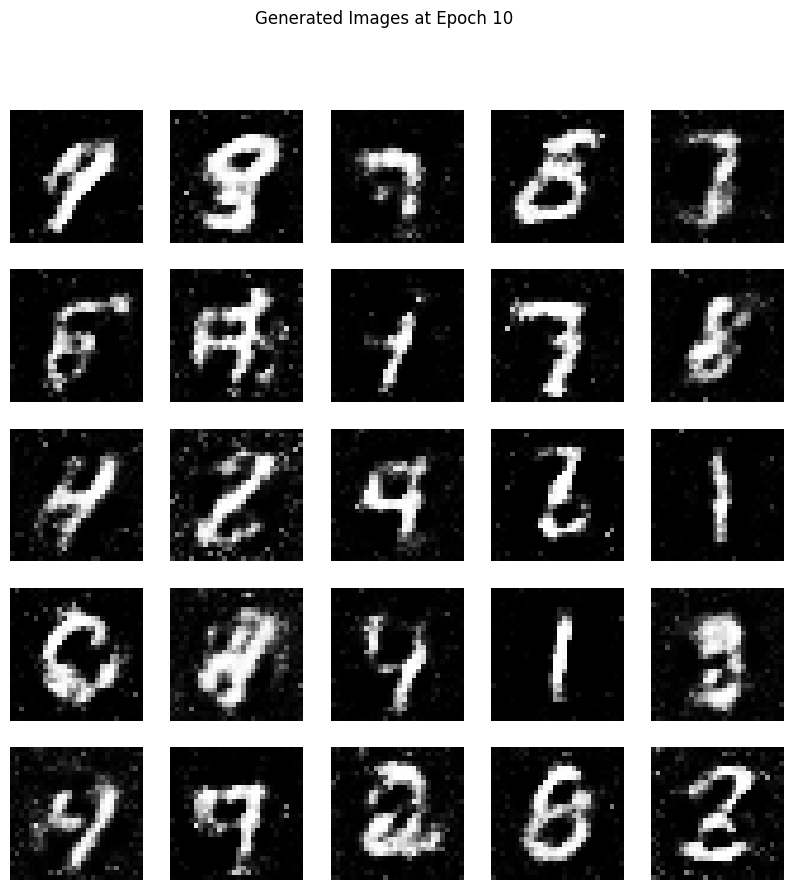

[Epoch 10/15] [Batch 0/469] [D loss: 1.3547] [G loss: 1.2247]
[Epoch 10/15] [Batch 50/469] [D loss: 1.2887] [G loss: 0.9675]
[Epoch 10/15] [Batch 100/469] [D loss: 1.2716] [G loss: 0.8262]
[Epoch 10/15] [Batch 150/469] [D loss: 1.2586] [G loss: 1.1218]
[Epoch 10/15] [Batch 200/469] [D loss: 1.2693] [G loss: 0.9172]
[Epoch 10/15] [Batch 250/469] [D loss: 1.2066] [G loss: 1.1037]
[Epoch 10/15] [Batch 300/469] [D loss: 1.2605] [G loss: 1.2488]
[Epoch 10/15] [Batch 350/469] [D loss: 1.2894] [G loss: 0.9737]
[Epoch 10/15] [Batch 400/469] [D loss: 1.2341] [G loss: 0.9746]
[Epoch 10/15] [Batch 450/469] [D loss: 1.3016] [G loss: 0.9197]

Epoch [10/15] - Average G_loss: 0.9883, Average D_loss: 1.2597

[Epoch 11/15] [Batch 0/469] [D loss: 1.2700] [G loss: 0.7840]
[Epoch 11/15] [Batch 50/469] [D loss: 1.2570] [G loss: 1.0869]
[Epoch 11/15] [Batch 100/469] [D loss: 1.3177] [G loss: 0.9531]
[Epoch 11/15] [Batch 150/469] [D loss: 1.2210] [G loss: 0.8945]
[Epoch 11/15] [Batch 200/469] [D loss: 1.2481

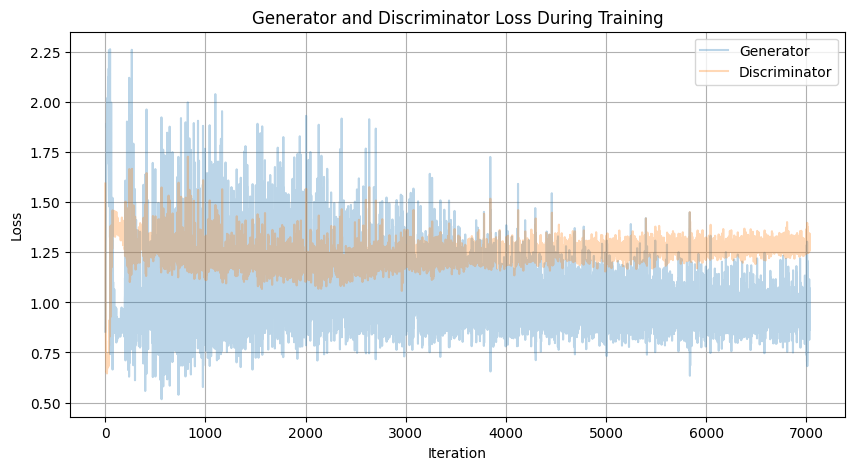

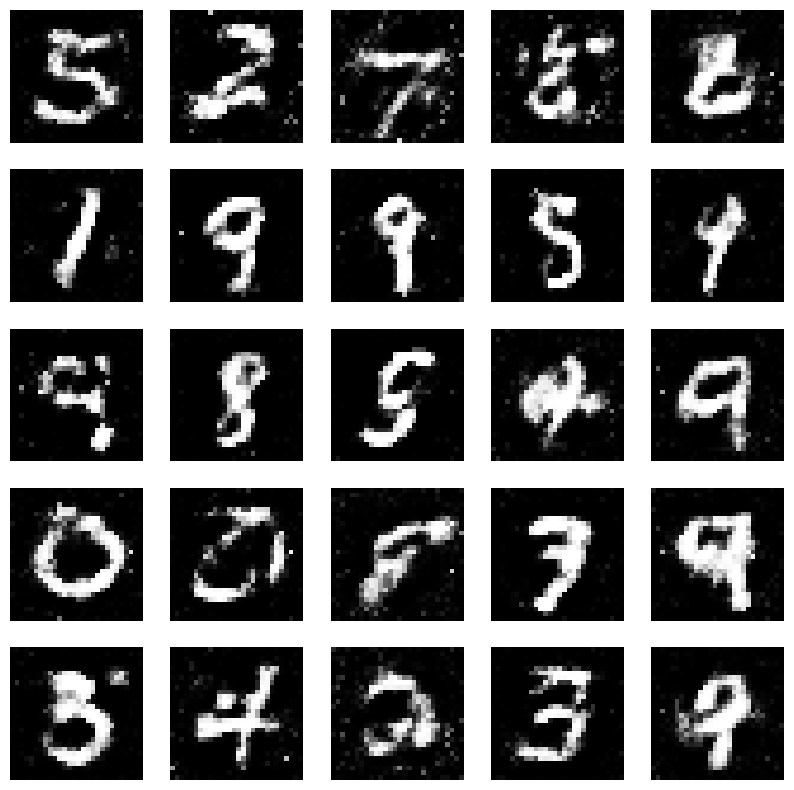

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
image_dim = 28 * 28  # MNIST images are 28x28
latent_dim = 100
hidden_dim = 256  # Reduced from 512
batch_size = 128  # Reduced from 256
num_epochs = 15  # Increased from 50
lr = 0.0002  # Increased from 0.0001
beta1 = 0.5

# Load MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_dataset = torchvision.datasets.MNIST(root='./data', 
                                         train=True,
                                         transform=transform,
                                         download=True)

dataloader = DataLoader(mnist_dataset, batch_size=batch_size,
                       shuffle=True, num_workers=2)

# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),
            
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.BatchNorm1d(hidden_dim * 2),
            nn.LeakyReLU(0.2),
            
            nn.Linear(hidden_dim * 2, hidden_dim * 2),
            nn.BatchNorm1d(hidden_dim * 2),
            nn.LeakyReLU(0.2),
            
            nn.Linear(hidden_dim * 2, image_dim),
            nn.Tanh()
        )
    
    def forward(self, z):
        return self.model(z)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_dim, hidden_dim * 2),
            nn.LayerNorm(hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize networks and optimizers
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

generator = Generator().to(device)
discriminator = Discriminator().to(device)

g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Add learning rate schedulers
g_scheduler = optim.lr_scheduler.ExponentialLR(g_optimizer, gamma=0.995)
d_scheduler = optim.lr_scheduler.ExponentialLR(d_optimizer, gamma=0.995)

criterion = nn.BCELoss()

# Lists to store losses for plotting
G_losses = []
D_losses = []
epoch_g_losses = []
epoch_d_losses = []

# Generate and display sample images
def generate_samples(generator, epoch=None, num_samples=25):
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_samples, latent_dim).to(device)
        generated_images = generator(noise).cpu()
        generated_images = generated_images.view(-1, 1, 28, 28)
        
    plt.figure(figsize=(10,10))
    for i in range(num_samples):
        plt.subplot(5, 5, i+1)
        plt.imshow(generated_images[i].squeeze().numpy(), cmap='gray')
        plt.axis('off')
    
    if epoch is not None:
        plt.suptitle(f'Generated Images at Epoch {epoch+1}')
    plt.show()
    generator.train()


# Training loop with early stopping
def train_gan(generator, discriminator, dataloader, num_epochs, device, 
              g_optimizer, d_optimizer, criterion):
    G_losses = []
    D_losses = []
    epoch_g_losses = []
    epoch_d_losses = []
    
    
    print("Starting Training...")
    
    for epoch in range(num_epochs):
        epoch_g_loss = 0
        epoch_d_loss = 0
        n_batches = 0
        
        for i, (real_images, _) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.view(-1, image_dim).to(device)
            
            # Labels for real and fake images
            real_label = 0.9 * torch.ones(batch_size).to(device)
            fake_label = torch.zeros(batch_size).to(device)

            ############################
            # Train Discriminator
            ############################
            d_optimizer.zero_grad()
            
            output_real = discriminator(real_images).squeeze()
            d_loss_real = criterion(output_real, real_label)
            
            noise = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(noise)
            output_fake = discriminator(fake_images.detach()).squeeze()
            d_loss_fake = criterion(output_fake, fake_label)
            
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            d_optimizer.step()

            ############################
            # Train Generator
            ############################
            g_optimizer.zero_grad()
            
            noise = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(noise)
            output_fake = discriminator(fake_images).squeeze()
            g_loss = criterion(output_fake, real_label)
            g_loss.backward()
            g_optimizer.step()

            # Store losses
            G_losses.append(g_loss.item())
            D_losses.append(d_loss.item())
            
            epoch_g_loss += g_loss.item()
            epoch_d_loss += d_loss.item()
            n_batches += 1
            
            if i % 50 == 0:
                print(f'[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(dataloader)}] '
                      f'[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]')
        
        # Calculate average epoch losses
        avg_g_loss = epoch_g_loss / n_batches
        avg_d_loss = epoch_d_loss / n_batches
        epoch_g_losses.append(avg_g_loss)
        epoch_d_losses.append(avg_d_loss)
        
        print(f'\nEpoch [{epoch}/{num_epochs}] - '
              f'Average G_loss: {avg_g_loss:.4f}, Average D_loss: {avg_d_loss:.4f}\n')

        if (epoch + 1) % 10 == 0:
            generate_samples(generator, epoch)
            
    return G_losses, D_losses, epoch_g_losses, epoch_d_losses

# Use the modified training loop
G_losses, D_losses, epoch_g_losses, epoch_d_losses = train_gan(
    generator, discriminator, dataloader, num_epochs, device, 
    g_optimizer, d_optimizer, criterion
)

# Plot training losses
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="Generator", alpha=0.3)
plt.plot(D_losses, label="Discriminator", alpha=0.3)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Generate final sample images
generate_samples(generator)

# Save the models
torch.save({
    'generator_state_dict': generator.state_dict(),
    'discriminator_state_dict': discriminator.state_dict(),
    'g_optimizer_state_dict': g_optimizer.state_dict(),
    'd_optimizer_state_dict': d_optimizer.state_dict(),
}, 'mnist_gan_model.pth')

# DC-GAN

Random Seed:  999


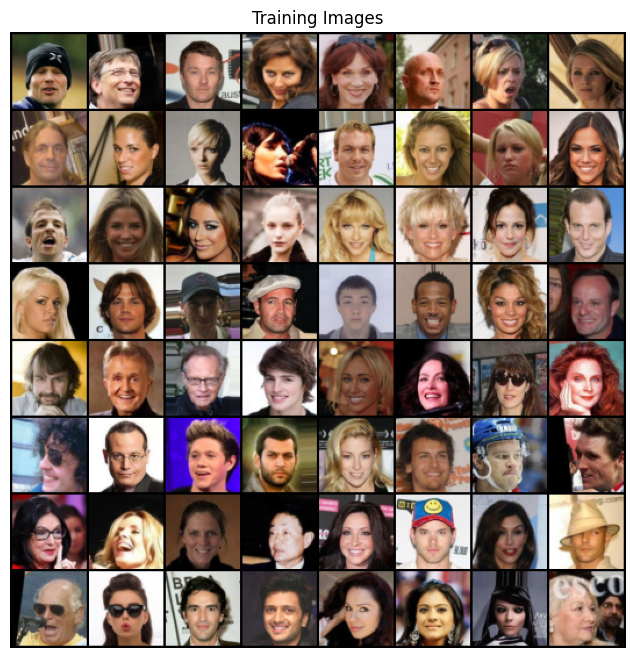

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/Users/luisvalencia/Desktop/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/Users/luisvalencia/Desktop/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/Users/luisvalencia/Desktop/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/datasets/folder.py", line 245, in __getitem__
    sample = self.loader(path)
  File "/Users/luisvalencia/Desktop/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/datasets/folder.py", line 284, in default_loader
    return pil_loader(path)
  File "/Users/luisvalencia/Desktop/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/datasets/folder.py", line 262, in pil_loader
    with open(path, "rb") as f:
         ~~~~^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'data/celeba/img_align_celeba/079263.jpg'


In [3]:
# Root directory for dataset
dataroot = "data/celeba"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)
    
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)
# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

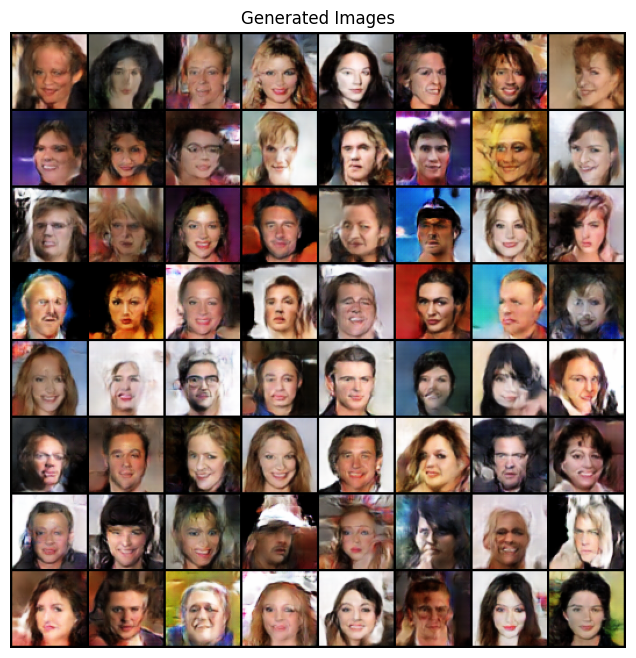

In [ ]:
# Generate images
num_images = 64  # How many images you want to generate
noise = torch.randn(num_images, nz, 1, 1, device=device)  # Random noise
with torch.no_grad():
    generated_images = netG(noise).detach().cpu()

# Show generated images
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(vutils.make_grid(generated_images, padding=2, normalize=True),(1,2,0)))
plt.show()